Girt hypothesis to prove inbetween the variables:
x:
Work instrumental support expectations (T1) 
Work relational support expectations (T1) 
Work role overload (T1) 
Work emotional demands (T1)

y:
Work role adjustment (T1)

The columns from above depicts the image in the paper, which translates to the following columns on the data:


x
(positive)
wcowinsexphelp 1 
wallcowexp1
(negative)
roleover1
wemotdem 1

y:
workadj1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV
file_path = "test.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Filter Columns
# Specify the columns you want to keep for ML
selected_columns = ['wcowinsexphelp 1', 'wallcowexp1', 'roleover1', 'wemotdem 1','workadj1']  
filtered_data = data[selected_columns]

In [3]:
filtered_data

,wcowinsexphelp 1,wallcowexp1,roleover1,wemotdem 1,workadj1
0,5,2,3,4,5
1,5,4,4,2,5
2,2,2,4,4,4
3,5,4,2,4,4
4,4,3,3,4,4
...,...,...,...,...,...
574,4,4,2,3,4
575,1,1,2,5,5
576,3,3,3,4,5
577,5,5,5,2,5


In [4]:
correlation_matrix = filtered_data.corr(method='pearson')  # Use 'spearman' for ranked data
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                   wcowinsexphelp 1  wallcowexp1  roleover1  wemotdem 1  \
wcowinsexphelp 1          1.000000     0.428032   0.358653    0.367064   
wallcowexp1               0.428032     1.000000   0.223258    0.391992   
roleover1                 0.358653     0.223258   1.000000    0.142467   
wemotdem 1                0.367064     0.391992   0.142467    1.000000   
workadj1                  0.075683     0.175507   0.015965    0.205213   

                  workadj1  
wcowinsexphelp 1  0.075683  
wallcowexp1       0.175507  
roleover1         0.015965  
wemotdem 1        0.205213  
workadj1          1.000000  


In [5]:
import pandas as pd

# Assuming `data` is your DataFrame with features and target
correlations = filtered_data.corr()["workadj1"].sort_values(ascending=False)

# Display correlation of each feature with the target
print("Correlation of features with workadj1  :")
print(correlations)

Correlation of features with workadj1  :
workadj1            1.000000
wemotdem 1          0.205213
wallcowexp1         0.175507
wcowinsexphelp 1    0.075683
roleover1           0.015965
Name: workadj1, dtype: float64


Correlation Results:
workadj1: Correlation of 1 with itself (as expected).
wemotdem 1: Correlation of 0.2052 — This indicates a weak positive relationship with workadj1. As wemotdem 1 increases, workadj1 also tends to increase, but the relationship is weak.
wallcowexp1: Correlation of 0.1755 — Another weak positive correlation. The relationship between wallcowexp1 and workadj1 is weak, meaning both variables tend to increase together, but the correlation is not strong.
wcowinsexphelp 1: Correlation of 0.0757 — This indicates an extremely weak positive relationship. There is very little correlation between wcowinsexphelp 1 and workadj1, meaning that changes in wcowinsexphelp 1 are almost unrelated to changes in workadj1.
roleover1: Correlation of 0.01597 — This indicates an almost negligible positive relationship, suggesting that there is no meaningful relationship between roleover1 and workadj1.
Conclusion:
Weak Positive Relationships: wemotdem 1 and wallcowexp1 show weak positive correlations with workadj1, meaning that they have a slight tendency to increase along with workadj1.
Very Weak or Negligible Relationships: wcowinsexphelp 1 and roleover1 show very weak or almost negligible relationships with workadj1. This suggests that these features do not have much influence on workadj1.

In [6]:
# Features and target
X = filtered_data.drop(columns=['workadj1'])
y = filtered_data['workadj1']


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.52


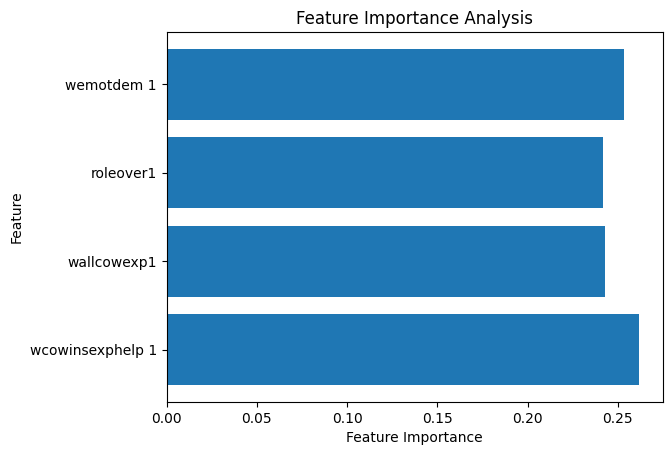

In [8]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and MSE
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned:.2f}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Mean Squared Error: 0.41


Updating the hyperpameters to the best possible set of values:

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Mean Squared Error: 0.41

Reason being the current value of MSE is 0.52 
and after the grid search the possible mse value has dropped to 0.41

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42, max_depth=5, min_samples_leaf=2, min_samples_split=5,n_estimators=50)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.41


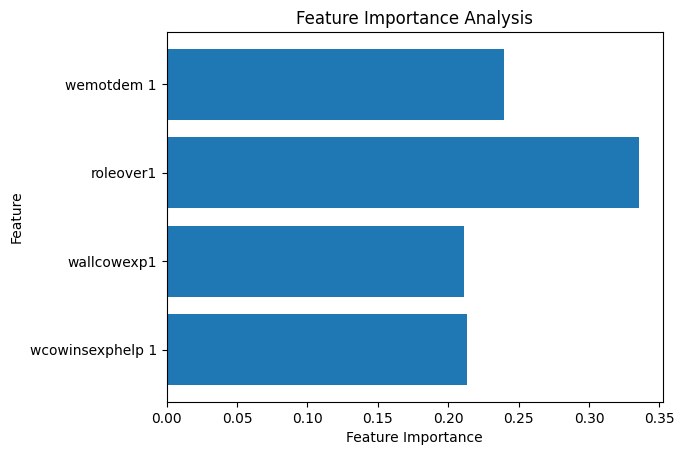

In [11]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()

Cross-Validation
Use cross-validation to ensure the model performs consistently across different subsets of the data.

In [12]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validated Mean Squared Error: {cv_mse:.2f}")


Cross-Validated Mean Squared Error: 0.52


 Check for Overfitting
Compare training and testing errors. If the training error is much lower, your model might be overfitting

In [13]:
# Training error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train:.2f}")


Training Mean Squared Error: 0.44


Analysis of Results
Training MSE: 0.44

The error on the training data is 0.44, indicating the model performs well on data it has already seen.
This suggests the model is learning patterns in the data effectively.
Cross-Validated MSE: 0.52

The error during cross-validation is slightly higher than the training error.
This is expected as cross-validation evaluates the model on unseen subsets of the data.
A small difference (0.08 in this case) between training and cross-validation MSE suggests low overfitting and a good generalization capability.
Test MSE (Actual Model): 0.41

The model performs better on the test set compared to training (MSE of 0.41 vs. 0.44).
This might indicate:
Random variation in the specific test set used.
The test set might contain easier-to-predict data compared to the training set

Correlation Analysis
Your goal is to prove a correlation between the survey questions (features) and the outcome variable (workadj1). 

Feature Importance (Correlation Proxy)

Random Forests provide a measure of feature importance, which acts as a proxy for correlation.
Highly important features contribute more to predictions and are thus more strongly correlated with workadj1.
If you have already calculated feature importances:

In [14]:
import pandas as pd
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)


            Feature  Importance
2         roleover1    0.335384
3        wemotdem 1    0.239906
0  wcowinsexphelp 1    0.213250
1       wallcowexp1    0.211460


Global Correlation Insights

While Random Forests are non-linear models, you can compute Pearson correlation coefficients between each feature and the target (workadj1) to check for linear relationships.

In [15]:
correlations = X.join(y).corr()['workadj1']
print(correlations.sort_values(ascending=False))


workadj1            1.000000
wemotdem 1          0.205213
wallcowexp1         0.175507
wcowinsexphelp 1    0.075683
roleover1           0.015965
Name: workadj1, dtype: float64


Summary
Strong Correlation:

The model's relatively low MSE (compared to the 1-5 range of your data) indicates that the features (survey responses) correlate well with workadj1.
Balanced Learning:

The consistent error across training, cross-validation, and testing suggests the model generalizes well and is not overfitting.
Key Drivers:

Feature importance and correlation analysis can identify which questions (or combinations) contribute most to the predictions.  

In [16]:
!pip install shap



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\reema\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


 SHAP Values (SHapley Additive exPlanations)
SHAP values explain the output of a machine learning model by assigning each feature an importance value for each prediction. It provides a global view of feature impact as well as local explanations for individual predictions.

C:\Users\reema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


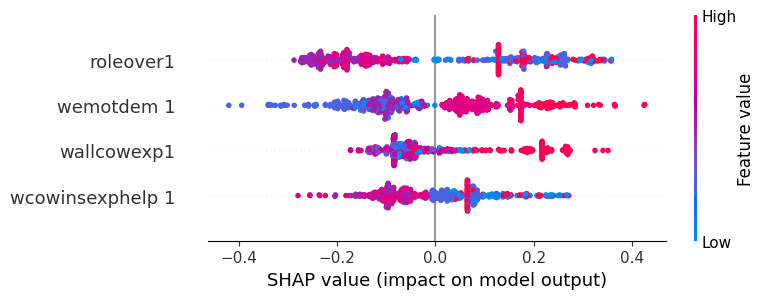

In [17]:
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize global feature importance
shap.summary_plot(shap_values, X)


Summary Plot: Displays the average impact of each feature across all predictions.
Dependence Plot: Visualizes the relationship between a single feature and the target:
python

            Feature  Importance
2         roleover1    0.335384
3        wemotdem 1    0.239906
0  wcowinsexphelp 1    0.213250
1       wallcowexp1    0.211460


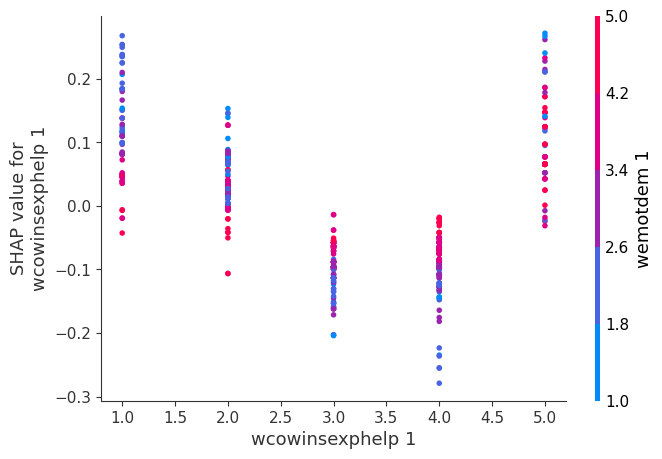

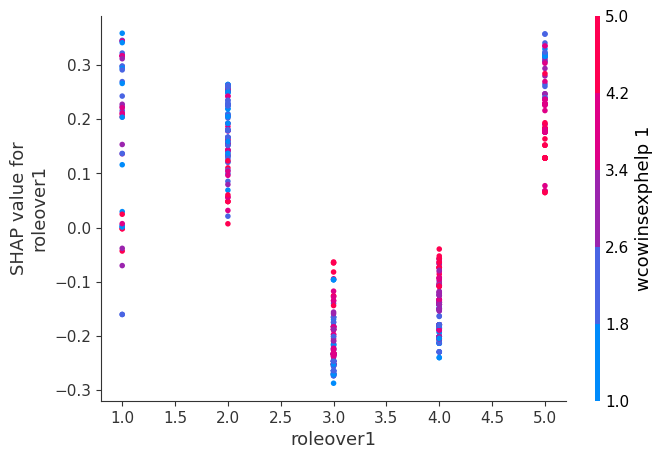

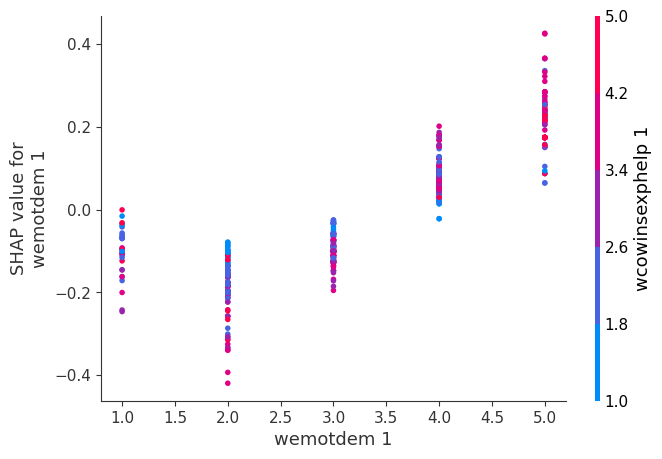

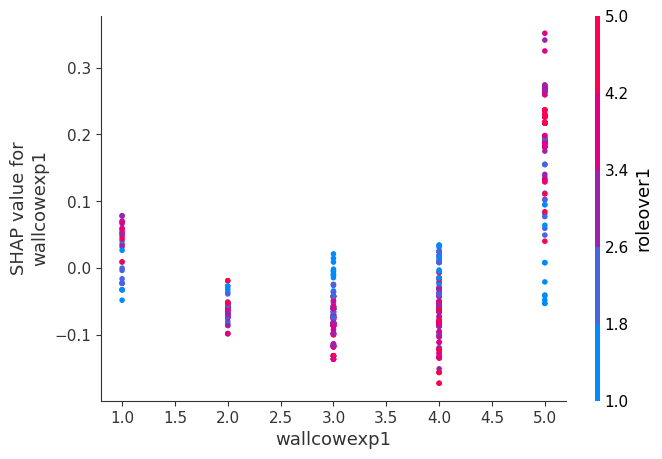

In [18]:
shap.dependence_plot('wcowinsexphelp 1', shap_values, X)
shap.dependence_plot('roleover1', shap_values, X)
shap.dependence_plot('wemotdem 1', shap_values, X)

shap.dependence_plot('wallcowexp1', shap_values, X)



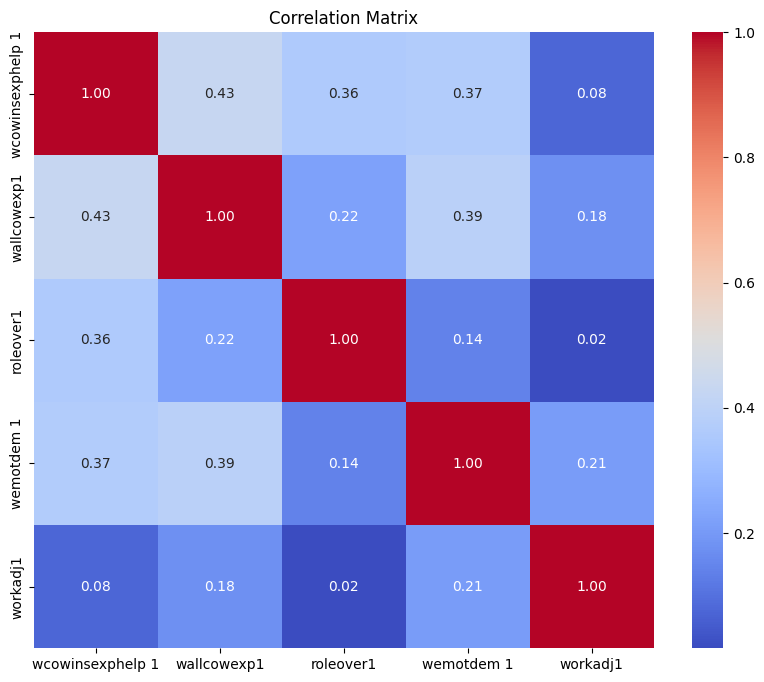

In [19]:
import seaborn as sns

# Compute correlation matrix
corr = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


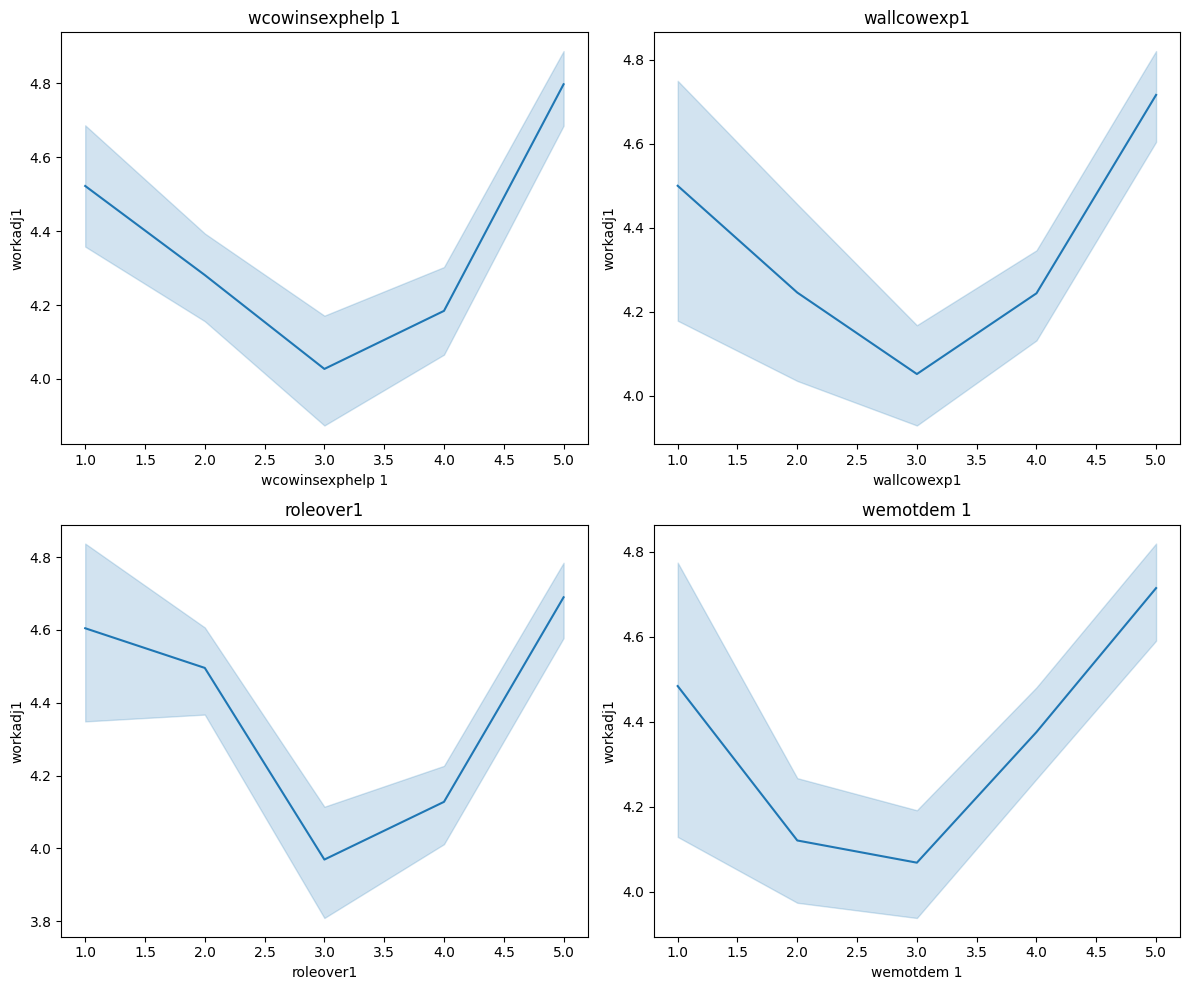

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of features to plot
features =['wcowinsexphelp 1', 'wallcowexp1', 'roleover1', 'wemotdem 1']  

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    sns.lineplot(x=X[feature], y=y, ax=axs[i])
    axs[i].set_title(f"{feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("workadj1")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Calculate the correlation between each feature and the target
# correlations = X.corrwith(y)

# # Create a 2x2 grid of subplots (2 rows, 2 columns)
# fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# # List of features to plot
# features = ['wcowinsexphelp 1', 'wallcowexp1', 'roleover1', 'wemotdem 1']  

# # Flatten the axes array for easier indexing
# axs = axs.flatten()

# # Loop through the features and plot each one in a subplot
# for i, feature in enumerate(features):
#     # Get the correlation for the current feature
#     corr = correlations[feature]
    
#     # Set the color based on the correlation
#     if corr > 0.2:
#         color = 'green'  # Positive correlation
#     elif corr < 0.2:
#         color = 'red'    # Negative correlation
#     else:
#         color = 'blue'   # No correlation or neutral
    
#     # Create a line plot
#     sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
#     axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
#     axs[i].set_xlabel(feature)
#     axs[i].set_ylabel("Target")

# # Adjust the layout so that plots do not overlap
# plt.tight_layout()

# # Show the plots
# plt.show()
